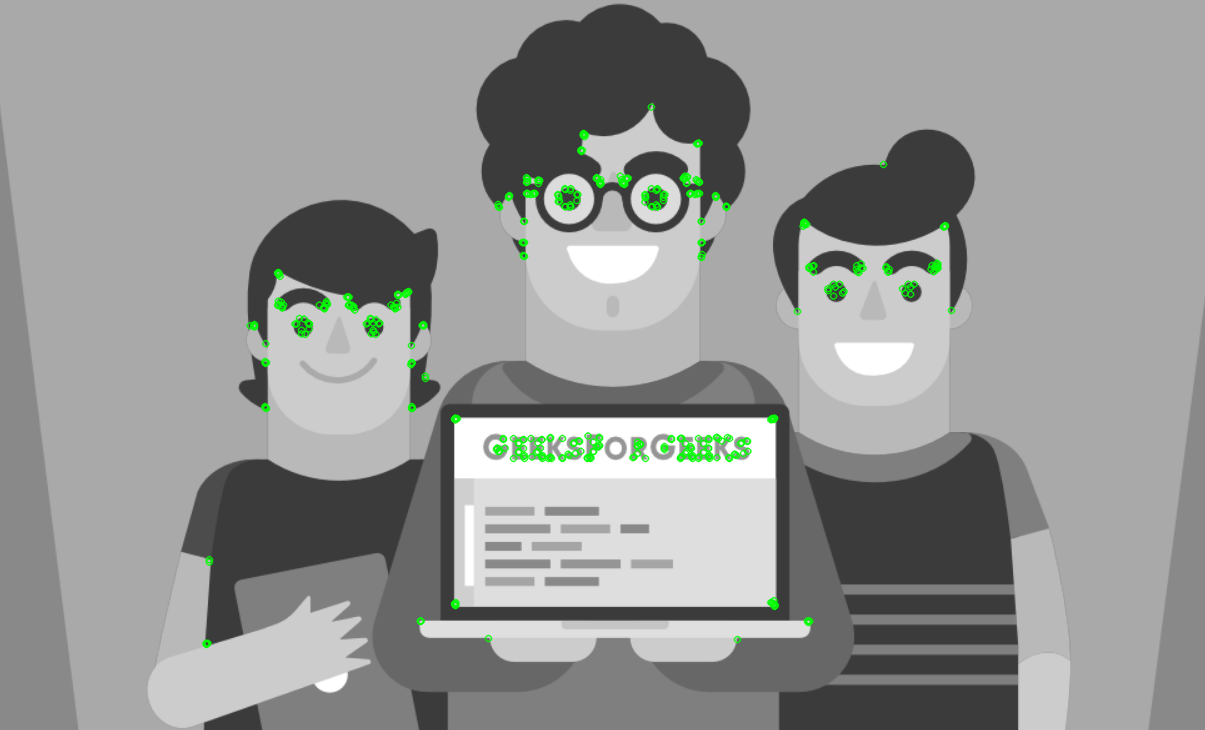

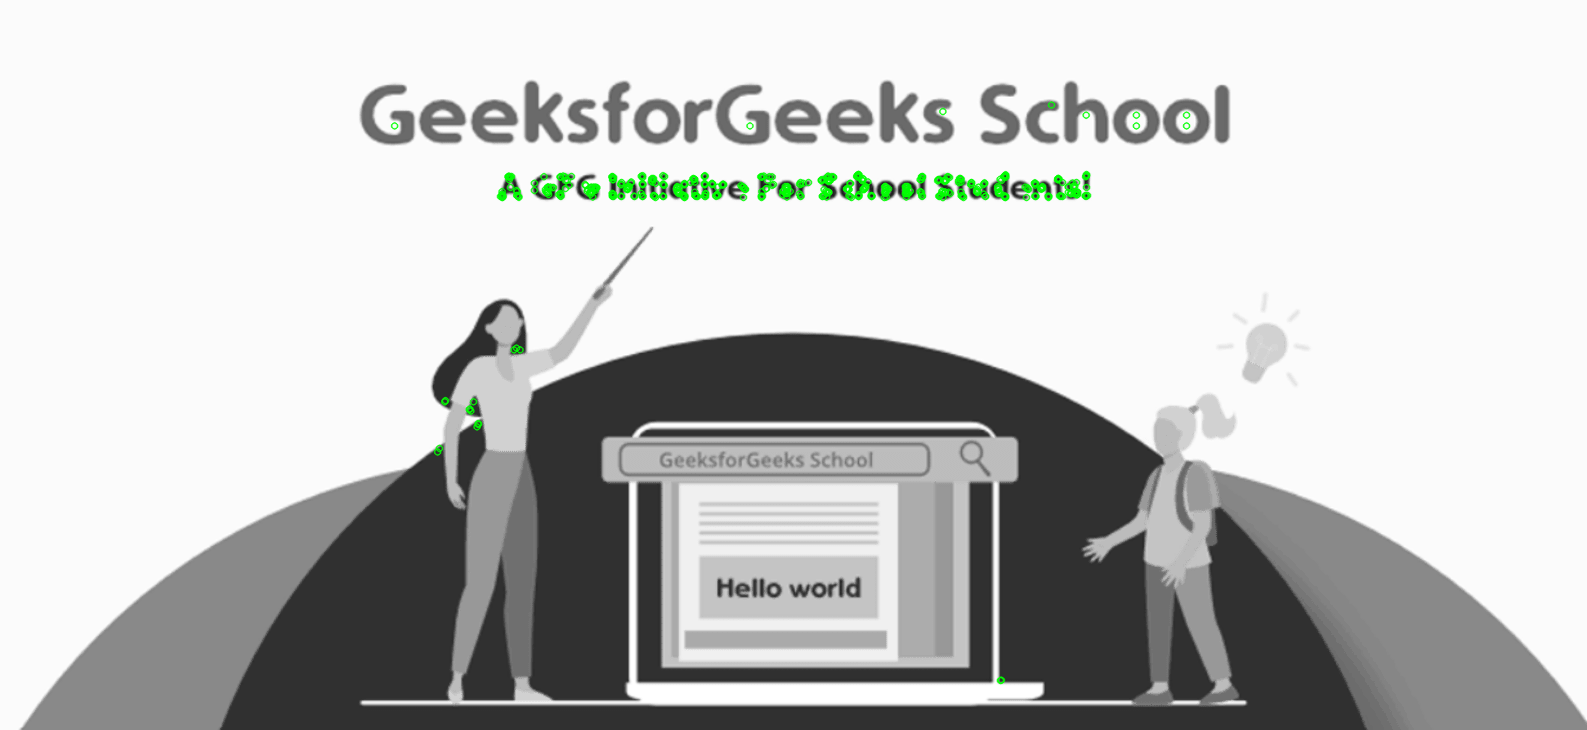

In [ ]:
#1. ORB (Oriented FAST and Rotated BRIEF)
import cv2
from google.colab.patches import cv2_imshow
# Load the images
img1 = cv2.imread('image1.png', 0)
img2 = cv2.imread('image2.png', 0)

# Detect keypoints and descriptors using ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Draw keypoints
img1_kp = cv2.drawKeypoints(img1, kp1, None, color=(0, 255, 0))
img2_kp = cv2.drawKeypoints(img2, kp2, None, color=(0, 255, 0))

# Display keypoints
cv2_imshow(img1_kp)
cv2_imshow(img2_kp)
cv2.waitKey(0)
cv2.destroyAllWindows()



2. BFMatcher (Brute-Force Matcher)

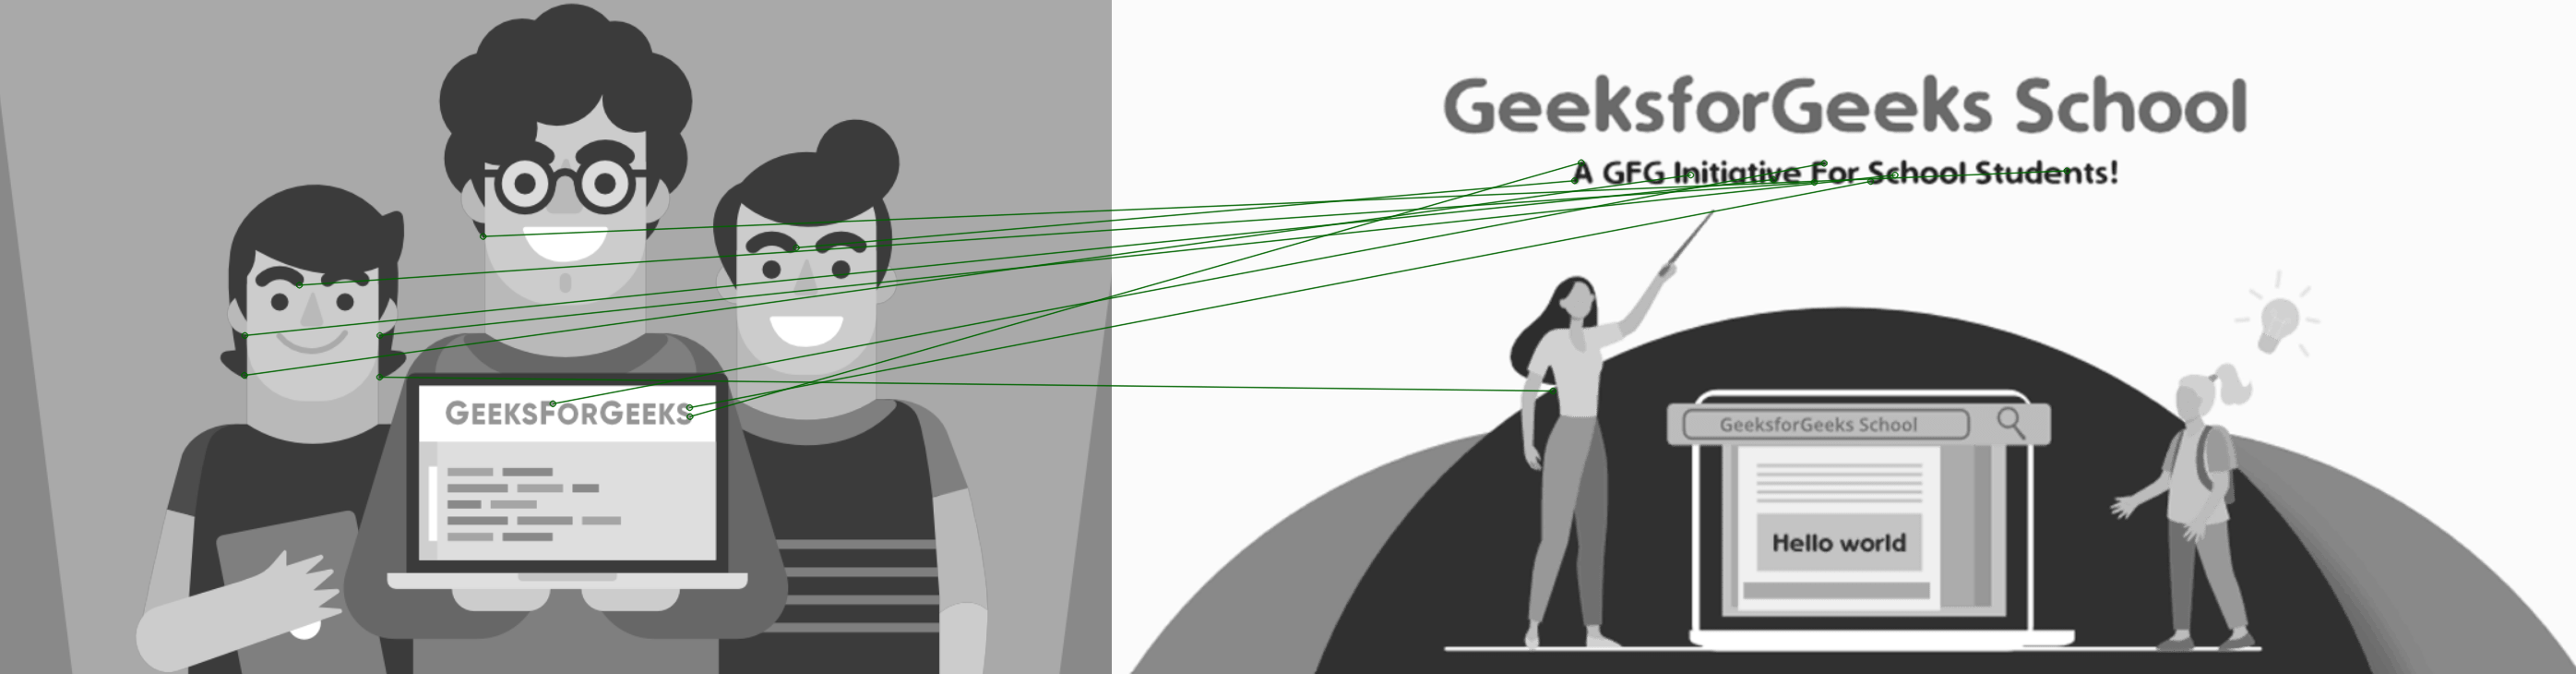

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load the images
img1 = cv2.imread('image1.png', 0)
img2 = cv2.imread('image2.png', 0)

# Detect keypoints and descriptors using ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Initialize BFMatcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches with dark green color (BGR: (0, 100, 0))
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, matchColor=(0, 100, 0), flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
cv2_imshow(img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()



3. FLANN-based Matcher (Fast Library for Approximate Nearest Neighbors)

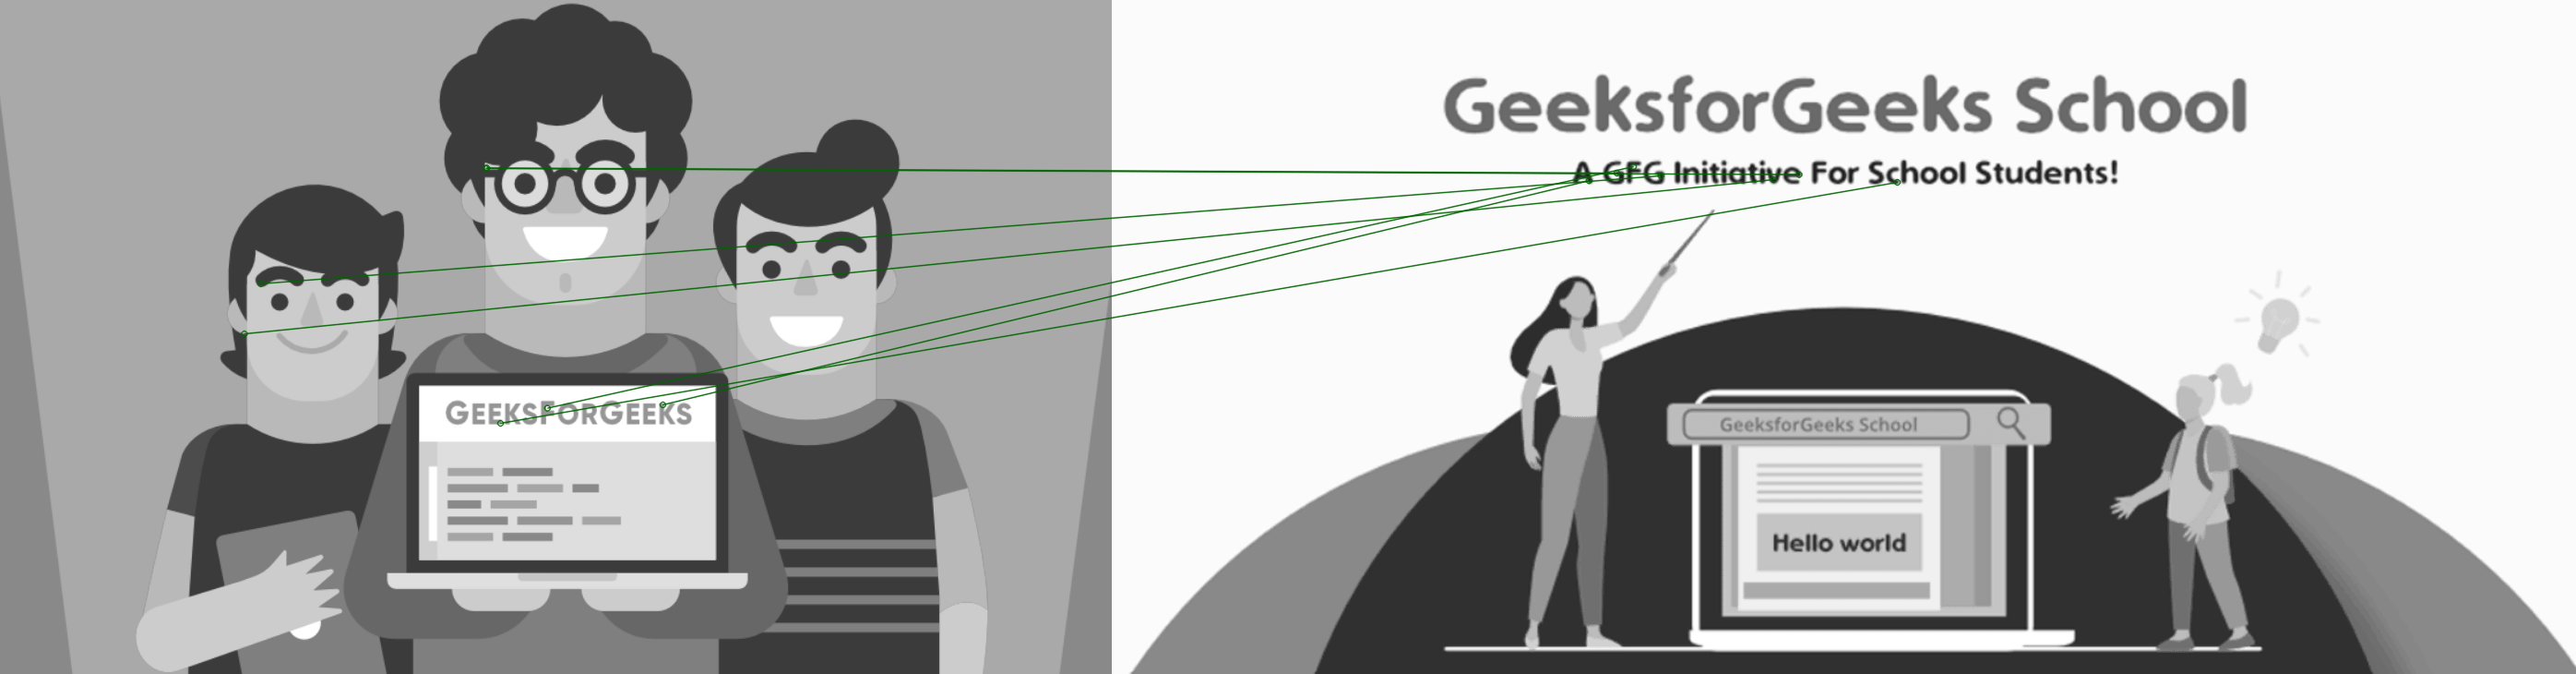

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the images
img1 = cv2.imread('image1.png', 0)  # Query image
img2 = cv2.imread('image2.png', 0)  # Train image

# Detect keypoints and descriptors using ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# FLANN parameters for ORB (LSH algorithm)
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH,
                    table_number=6,  # 12
                    key_size=12,     # 20
                    multi_probe_level=1)  # 2
search_params = dict(checks=50)  # or pass an empty dictionary

# Initialize FLANN-based matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Perform KNN matching
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test to filter matches
good_matches = []
for m_n in matches:
    if len(m_n) == 2:
        m, n = m_n
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

# Draw matches with dark green color (BGR: (0, 100, 0))
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, matchColor=(0, 100, 0), flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
cv2_imshow(img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()
